# From Caffeine to Cocaine?: Bolivian Coffee Farmers Switching to More Profitable Crops

## Background: 
### I grew up in Bolivia, and I drink coffee religiously. I've heard anecdotally that coffee farmers are switching crops from coffee to Coca leaves since it is more profitable. Coca leaves are the main component to the highly addictive and illegal drug cocaine, which has several negative repercussions. 

## Impact: 
### The Centers for Disease Control and Prevention’s latest provisional data predicted 24,618 overdose deaths involving cocaine in 2021, a 23.5 percent increase compared to cocaine-involved deaths in 2020 (19,927 deaths). 

## Problem Statement: 
### In this project, I want to study the relationship between Coca Leaves and Coffee using public datasets available and prove whether there is a direct correlation between coffee farming decrease and increased coca leaves farming.

More on coca here: https://en.wikipedia.org/wiki/Coca

In [2]:
# Not-exhaustive project checklist
# Note: this is not a writing assignment, but you should still incorporate comments or headers throughout
# -- This will help others who review your work, but will also help you keep track of what you're doing
# -- Just think about what would help you understand a peer's project when you have to grade theirs later


# 1) Dataset included
# 1a) Dataset explained/documented when used
# 2) Analysis performed
# 2a) Analysis steps documented, explained briefly
# 3) Visualizations/outputs
# 4) Conclusion
# ---Did you answer your questions?
# ---Did you find anything else?
# ---What problems did you run into?
# ---Any suggestions for future research?

# Critical checks before submission
# - Does the noteboook run without error? (Kernel>restart & run all => no errors at all? No long periods of processing?)
# - Do you have your dataset included here? You shouldn't be connecting to any external data
# - - Even if external datasets work here, they WILL NOT work for peer-grading, and you may get a 0.

## 1. Datasets

### We will bring in two separate datasets for this analysis, coffee and coca leaves. 
### For coca leaves data, I could not find a tabular format. However, I did find this article from the white house, so I manually created a csv file and uploaded into jupyter/vocareum: https://www.whitehouse.gov/ondcp/briefing-room/2022/07/14/ondcp-releases-data-on-coca-cultivation-and-production-in-the-andean-region/
### For coffee data, I took the csv file from here and filtered by Bolivia: https://ourworldindata.org/grapher/coffee-bean-production

#### Let's take a look at the coffee data:

In [3]:
import pandas as pd
coffee = pd.read_excel('bolivia-coffee.xlsx')
coffee.columns

Index(['Entity', 'Year',
       'Coffee, green | 00000656 || Production | 005510 || tonnes'],
      dtype='object')

In [4]:
#we can see that the data ranges from 1961 - 2021 for the coffee data
coffee = coffee.rename(columns={'Coffee, green | 00000656 || Production | 005510 || tonnes':'coffee production in tons'},)
coffee

,Entity,Year,coffee production in tons
0,Bolivia,1961,4400.00
1,Bolivia,1962,4400.00
2,Bolivia,1963,4400.00
3,Bolivia,1964,7400.00
4,Bolivia,1965,4700.00
...,...,...,...
56,Bolivia,2017,21181.00
57,Bolivia,2018,22120.99
58,Bolivia,2019,24841.00
59,Bolivia,2020,23401.00


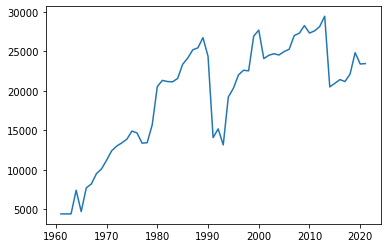

In [5]:
#simple graph shows us that there has been an upward trend but have had some downward crahses, note 1990s and 2012.
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(coffee['Year'],coffee['coffee production in tons'])

#### Let's now take a look at the coca data

In [6]:
coca = pd.read_csv('Bolivia-coca.csv')
coca.columns

Index(['Year', 'Bolivian-Coca-Cultivation-Hectares',
       'Bolivian-Coca-Production-Potential-Metric-Tons'],
      dtype='object')

In [7]:
#there are two main columns besides the year. Note that year only goes from 2011 - 2021. 
#The two relevant columns are: Bolivian-Coca-Cultivation-Hectares and Bolivian-Coca-Production-Potntial-Metric-Tons
coca

,Year,Bolivian-Coca-Cultivation-Hectares,Bolivian-Coca-Production-Potential-Metric-Tons
0,2011,25500.0,213.0
1,2012,25000.0,174.0
2,2013,27000.0,188.0
3,2014,35000.0,236.0
4,2015,36500.0,268.0
5,2016,37500.0,284.0
6,2017,31000.0,246.0
7,2018,32900.0,251.0
8,2019,42180.0,301.0
9,2020,39400.0,312.0


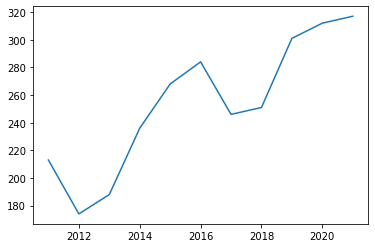

In [8]:
#let's graph this to see the overall trend. This has been historically trending upwards!
import seaborn as sns
import matplotlib.pyplot as plt

#plt.plot(coca['Year'],coca['Bolivian-Coca-Cultivation-Hectares'])
plt.plot(coca['Year'],coca['Bolivian-Coca-Production-Potential-Metric-Tons'])

In [9]:
#I am now combining both datasets, and note that uncommon dates are dropped, so our new range is 2011- 2021
combined = pd.merge(coca, coffee)
combined.dtypes
#need to change Bolivian-Coca-Cultivation-Hectares from string object to int

Year                                                int64
Bolivian-Coca-Cultivation-Hectares                float64
Bolivian-Coca-Production-Potential-Metric-Tons    float64
Entity                                             object
coffee production in tons                         float64
dtype: object

In [10]:
combined

,Year,Bolivian-Coca-Cultivation-Hectares,Bolivian-Coca-Production-Potential-Metric-Tons,Entity,coffee production in tons
0,2011,25500.0,213.0,Bolivia,27596.40
1,2012,25000.0,174.0,Bolivia,28136.86
2,2013,27000.0,188.0,Bolivia,29455.13
3,2014,35000.0,236.0,Bolivia,20496.00
4,2015,36500.0,268.0,Bolivia,20954.00
5,2016,37500.0,284.0,Bolivia,21427.00
6,2017,31000.0,246.0,Bolivia,21181.00
7,2018,32900.0,251.0,Bolivia,22120.99
8,2019,42180.0,301.0,Bolivia,24841.00
9,2020,39400.0,312.0,Bolivia,23401.00


In [11]:
#convert object to float
combined['Bolivian-Coca-Cultivation-Hectares'] = combined['Bolivian-Coca-Cultivation-Hectares'].astype(float)

In [12]:
#dropping Entity since it is not relevant 
combined = combined.drop('Entity', axis=1)
combined

,Year,Bolivian-Coca-Cultivation-Hectares,Bolivian-Coca-Production-Potential-Metric-Tons,coffee production in tons
0,2011,25500.0,213.0,27596.40
1,2012,25000.0,174.0,28136.86
2,2013,27000.0,188.0,29455.13
3,2014,35000.0,236.0,20496.00
4,2015,36500.0,268.0,20954.00
5,2016,37500.0,284.0,21427.00
6,2017,31000.0,246.0,21181.00
7,2018,32900.0,251.0,22120.99
8,2019,42180.0,301.0,24841.00
9,2020,39400.0,312.0,23401.00


## 2. Analysis Performed

### We will start our analysis with a correlation matrix, to see how the features are reated.
### We will then follow by running a multiple linear regression where Y = Coffee Production and the rest are X variables

In [13]:
corr_matrix = combined.corr()
corr_matrix

,Year,Bolivian-Coca-Cultivation-Hectares,Bolivian-Coca-Production-Potential-Metric-Tons,coffee production in tons
Year,1.000000,0.826304,0.883130,-0.475256
Bolivian-Coca-Cultivation-Hectares,0.826304,1.000000,0.941105,-0.605215
Bolivian-Coca-Production-Potential-Metric-Tons,0.883130,0.941105,1.000000,-0.583394
coffee production in tons,-0.475256,-0.605215,-0.583394,1.000000


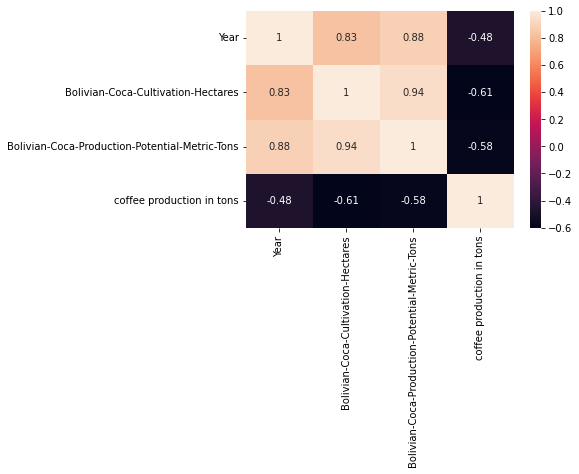

In [14]:
#correlation matrix shows us that Bolivian-Coca-Cultivation-Hectares and Bolivian-Coca-Production-Potential-Metric-Tons has a strong relationship

sns.heatmap(corr_matrix, annot=True)
plt.show()


## 3. Visualizations/outputs

### For visualizations, please look in sections 2 and 1. As for output, we will predict the coffee production value for the year 2022


In [17]:
#let's linear regression 


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# split the data into independent and dependent variables
X = combined.loc[:, combined.columns!='coffee production in tons']
y = combined['coffee production in tons']

# create a model and fit the data
model = LinearRegression().fit(X, y)

# get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# make predictions on new data
new_X = np.array([[2022, 41000 , 330]])
predicted_y = model.predict(new_X)

# print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Predicted y:", predicted_y)


Coefficients: [163.61109483  -0.25614883 -18.25726401]
Intercept: -292639.55608661147
Predicted y: [21655.07869837]


/usr/local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### The Predicted value for Coffee Production is 21655.08 Tons, for the year 2022, with the parameters 41000 for Bolivian Coca Cultivation Hectares , 330 for Bolivian Coca Potential Metric Tons

## 4. Conclusion

### Based on our analysis, we can conclude  that the decrease in coffee production is directly related to the increase coca leaves production. In our multiple linear regression, we predicted a lower value of coffee production for the year 2022. 

### For further research, I'd like to delve deeper into other features that could have a strong relationship with the decreased coffee production such as climate change, temperature, land fertility, employment rate, economy, and more macroeconomic factors pertinent to the country of Bolivia. I also recognize that the Years in the dataset used is limited, and would like to try to find data that goes further than 2011. 